**exercicio 2**

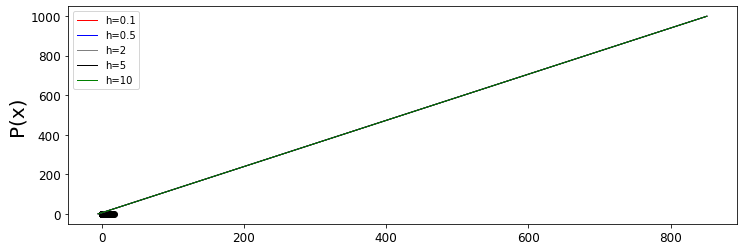

In [34]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib.pyplot import cm

color=['red', 'blue', 'gray', 'black', 'green', 'lightblue']

random.seed(42)
data = pd.read_csv('../input/diabetes-indiana/diabetes.csv', header=(0))

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=int)



# Converte para matriz e vetor do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]


def transformer(X,y):
    # Transforma os dados para terem media igual a zero e variancia igual a 1
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    # Seleciona os conjuntos de treinamento e teste
    p = 0.8 # fraction of elements in the test set
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = p, random_state = 42)
    
    return X_train, X_test, y_train, y_test

P = pd.DataFrame(data=np.zeros((X_train.shape[0], len(classes))), columns = classes)
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
def BayesianoNaoParametrico(X_train, X_test, y_train, y_test, classes, h):
#     print(len(X_train), len(X_test), len(y_train), len(y_test), len(classes), h)
    for i in np.arange(0, len(classes)): # Para cada classe
        element = tuple(np.where(y_train == classes[i])) # elementos na classe i
        Pc[i] = len(element)/len(y_train) # Probabilidade pertencer a classe i
        Z = X_train[element,:][0] # Elementos no conjunto de treinamento
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
        for j in np.arange(0,X_test.shape[0]): # para cada observacao no conjunto de teste
            x = X_test[j,:]
            x = x.reshape((1,len(x)))
            # calcula a probabilidade pertencer a cada classe
            pj = np.exp(kde.score_samples(x)) 
            P[classes[i]][j] = pj*Pc[i]

    y_pred = [] # Vetor com as classes preditas
    for i in np.arange(0, X_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred)
    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
#     print('Acuracia:', score)
    return score

score_BNaoParametrico = []


X_plot = np.linspace(np.min(X)-5, np.max(X)+5, 1000)[:, np.newaxis]

plt.figure(figsize=(12,4))
plt.plot(X[:, 0], 0.001*np.ones(X.shape[0]), 'ok')
c = 0
vh = [0.1, 0.5, 2, 5, 10]
for h in vh:
    score_BNaoParametrico = []
    X_train, X_test, y_train, y_test = transformer(X , y)
    score_BNaoParametrico.append(BayesianoNaoParametrico(X_train, X_test, y_train, y_test, classes, h))        
    plt.plot(X_plot,score_BNaoParametrico, color = color[c], linewidth=1, label = 'h='+str(h))
    c = c + 1

plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.ylim((0, 0.2))
plt.legend(fontsize = 10)
#plt.savefig('kernel.eps')
plt.show(True)